In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# load the data and assign to X and y
train = pd.read_csv('../data/train.csv')
X_test = pd.read_csv('../data/test.csv')

X_train = train.drop(labels = ["label"],axis = 1) 
y_train = train["label"]

# Now normalize the test and train sets
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape image in 3 dimensions (height = 28px, width = 28px)
X_train = X_train.values.reshape(-1,28,28)
X_test = X_test.values.reshape(-1,28,28)

In [10]:
# What are the sizes of the train and test sets?
print('train size: ' + str(len(X_train)) + ', test size: ' + str(len(X_test)))

train size: 42000, test size: 28000


In [11]:
# So we have 42,000 train images and 28,000 test images
# let's go ahead and print one
print(X_train[0].shape)

(28, 28)


(28, 28)


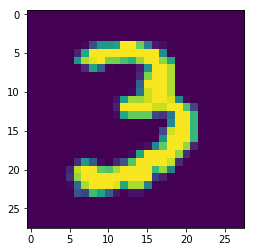

In [13]:
# Let's now reshape it into a 28 x 28 matrix
image = X_train[9]
print(image.shape)

# Let's plot it now
plt.imshow(image)

In [22]:
# Now let's look at the labels
print(y_train.values.shape)
y_train.values.reshape(-1, 1)

(42000,)


array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]])

In [26]:
# So the labels are NOT one hot encoded. We need to do that
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
y_train_ohe = enc.fit_transform(y_train.values.reshape(-1, 1))

In [28]:
y_train_ohe

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [31]:
# Let's first reset our graph, so our neural network components are all declared within the same graph
ops.reset_default_graph()

In [32]:
X = tf.placeholder(tf.float32, [784, None])
Y = tf.placeholder(tf.float32, [10, None])

In [33]:
# The weights for the input layer
W1 = tf.get_variable("W1", [64, 784], initializer=tf.contrib.layers.xavier_initializer(seed=1))

# The bias for the output from the input layer
b1 = tf.get_variable("b1", [64, 1], initializer=tf.zeros_initializer())

In [34]:
# The first layer (input layer)
Z1 = tf.add(tf.matmul(W1, X), b1)

# Let's add the activation function to the output signal from the first layer
A1 = tf.nn.relu(Z1)

In [36]:
# Weights and bias for the hidden layer
W2 = tf.get_variable("W2", [20, 64], initializer=tf.contrib.layers.xavier_initializer(seed=1))

b2 = tf.get_variable("b2", [20, 1], initializer=tf.zeros_initializer())

ValueError: Variable W2 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-35-595d4d458241>", line 1, in <module>
    W2 = tf.get_variable("W2", [20, 64], initializer=tf.contrib.layers.xavier_initializer(seed=1))
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):


In [37]:
# The second layer (hidden layer)
Z2 = tf.add(tf.matmul(W2, A1), b2) 

# Let's add the activation function to the output signal from the second layer
A2 = tf.nn.relu(Z2)

In [38]:
# Weights and bias for the output layer
W3 = tf.get_variable("W3", [10, 20], initializer=tf.contrib.layers.xavier_initializer(seed=1))

b3 = tf.get_variable("b3", [10, 1], initializer=tf.zeros_initializer())

In [39]:
# The third layer (output layer)
Z3 = tf.add(tf.matmul(W3, A2), b3)

In [40]:
# to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=tf.transpose(Z3), labels=tf.transpose(Y)))

In [41]:
# The learning rate for Gradient Descent algorithm
learning_rate = 0.5

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [42]:
# Now time to run the graph
init = tf.global_variables_initializer()

In [46]:
epochs = 20                                    # run a 20 epochs
batch_size = 256                               # for each epoch, train in batches of 200 images
number_of_images = X_train.shape[0] # number of images in training data
batches = number_of_images // batch_size       # number of batches in an epoch
print("Number of batches:", batches)

Number of batches: 164


In [43]:
import time

In [ ]:
with tf.Session() as sess:
    # Initialize the variables
    sess.run(init)
    
    # run our training data through the neural network for each epoch
    for epoch in range(epochs):
      # Get a batch (random shuffled) from the training data
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      
      # Feed this batch through the neural network.
      _, epoch_cost = sess.run([optimizer, cost], feed_dict={X: batch_xs.T, Y: batch_ys.T})
      
      if epoch % 100 == 0:
        print("Epoch: ", epoch, epoch_cost)
        
    end = time.time()
    
    print("Training Time:", end - start)
    
    # Test the Model
    
    # Let's select the highest percent from the softmax output per image as the prediction.
    prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
    
    # Let's create another node for calculating the accuracy
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

    # Now let's run our trainingt images through the model to calculate our accuracy during training
    print ("Train Accuracy:", accuracy.eval({X: mnist.train.images.T, Y: mnist.train.labels.T}))
    
    # Now let's run our test images through the model to calculate our accuracy on the test data
    print ("Test Accuracy:", accuracy.eval({X: mnist.test.images.T, Y: mnist.test.labels.T}))